<a href="https://colab.research.google.com/github/rahiakela/computer-vision-research-and-practice/blob/main/opencv-projects-and-guide/ocr-works/07_improving_ocr_with_image_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Improving OCR with Basic Image Processing

**Reference**

https://github.com/PyImageSearch/imutils

In [ ]:
%%shell

sudo apt install tesseract-ocr
sudo apt-get install poppler-utils
pip install tesseract
pip install pytesseract
pip install Pillow==9.0.0
pip install pdf2image

In [ ]:
!sudo apt-get install poppler-utils

Just restart the colab environment.

In [1]:
import cv2
import pytesseract
import csv
import numpy as np

from pdf2image import convert_from_path
from io import BytesIO
from PIL import Image
from matplotlib import pyplot as plt

from google.colab.patches import cv2_imshow

%matplotlib inline

In [2]:
pytesseract.pytesseract.tesseract_cmd = (r'/usr/bin/tesseract')

In [13]:
!tesseract --help-psm

Page segmentation modes:
  0    Orientation and script detection (OSD) only.
  1    Automatic page segmentation with OSD.
  2    Automatic page segmentation, but no OSD, or OCR.
  3    Fully automatic page segmentation, but no OSD. (Default)
  4    Assume a single column of text of variable sizes.
  5    Assume a single uniform block of vertically aligned text.
  6    Assume a single uniform block of text.
  7    Treat the image as a single text line.
  8    Treat the image as a single word.
  9    Treat the image as a single word in a circle.
 10    Treat the image as a single character.
 11    Sparse text. Find as much text as possible in no particular order.
 12    Sparse text with OSD.
 13    Raw line. Treat the image as a single text line,
       bypassing hacks that are Tesseract-specific.


In [3]:
def img_display(im_data=None, img_path=None):
    dpi = 80
    if img_path is not None:
      im_data = plt.imread(img_path)

    height, width  = im_data.shape[:2]
    
    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()

In [4]:
def psm_options(img_path, options=None):
  image = cv2.imread(img_path)

  image_bgr = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

  # determine the text orientation
  results = pytesseract.image_to_string(image_bgr, config=options)
  return results

In [5]:
def grab_contours(cnts):
  # if the length the contours tuple returned by cv2.findContours
  # is '2' then we are using either OpenCV v2.4, v4-beta, or
  # v4-official
  if len(cnts) == 2:
      cnts = cnts[0]

  # if the length of the contours tuple is '3' then we are using
  # either OpenCV v3, v4-pre, or v4-alpha
  elif len(cnts) == 3:
      cnts = cnts[1]

  # otherwise OpenCV has changed their cv2.findContours return
  # signature yet again and I have no idea WTH is going on
  else:
      raise Exception(("Contours tuple must have length 2 or 3, "
          "otherwise OpenCV changed their cv2.findContours return "
          "signature yet again. Refer to OpenCV's documentation "
          "in that case"))

  # return the actual contours array
  return cnts

##Problem

In [8]:
pdf_file = 'document-page40.pdf'
pages = convert_from_path(pdf_file)
for page in pages:
  page.save("doc.jpg", "JPEG")

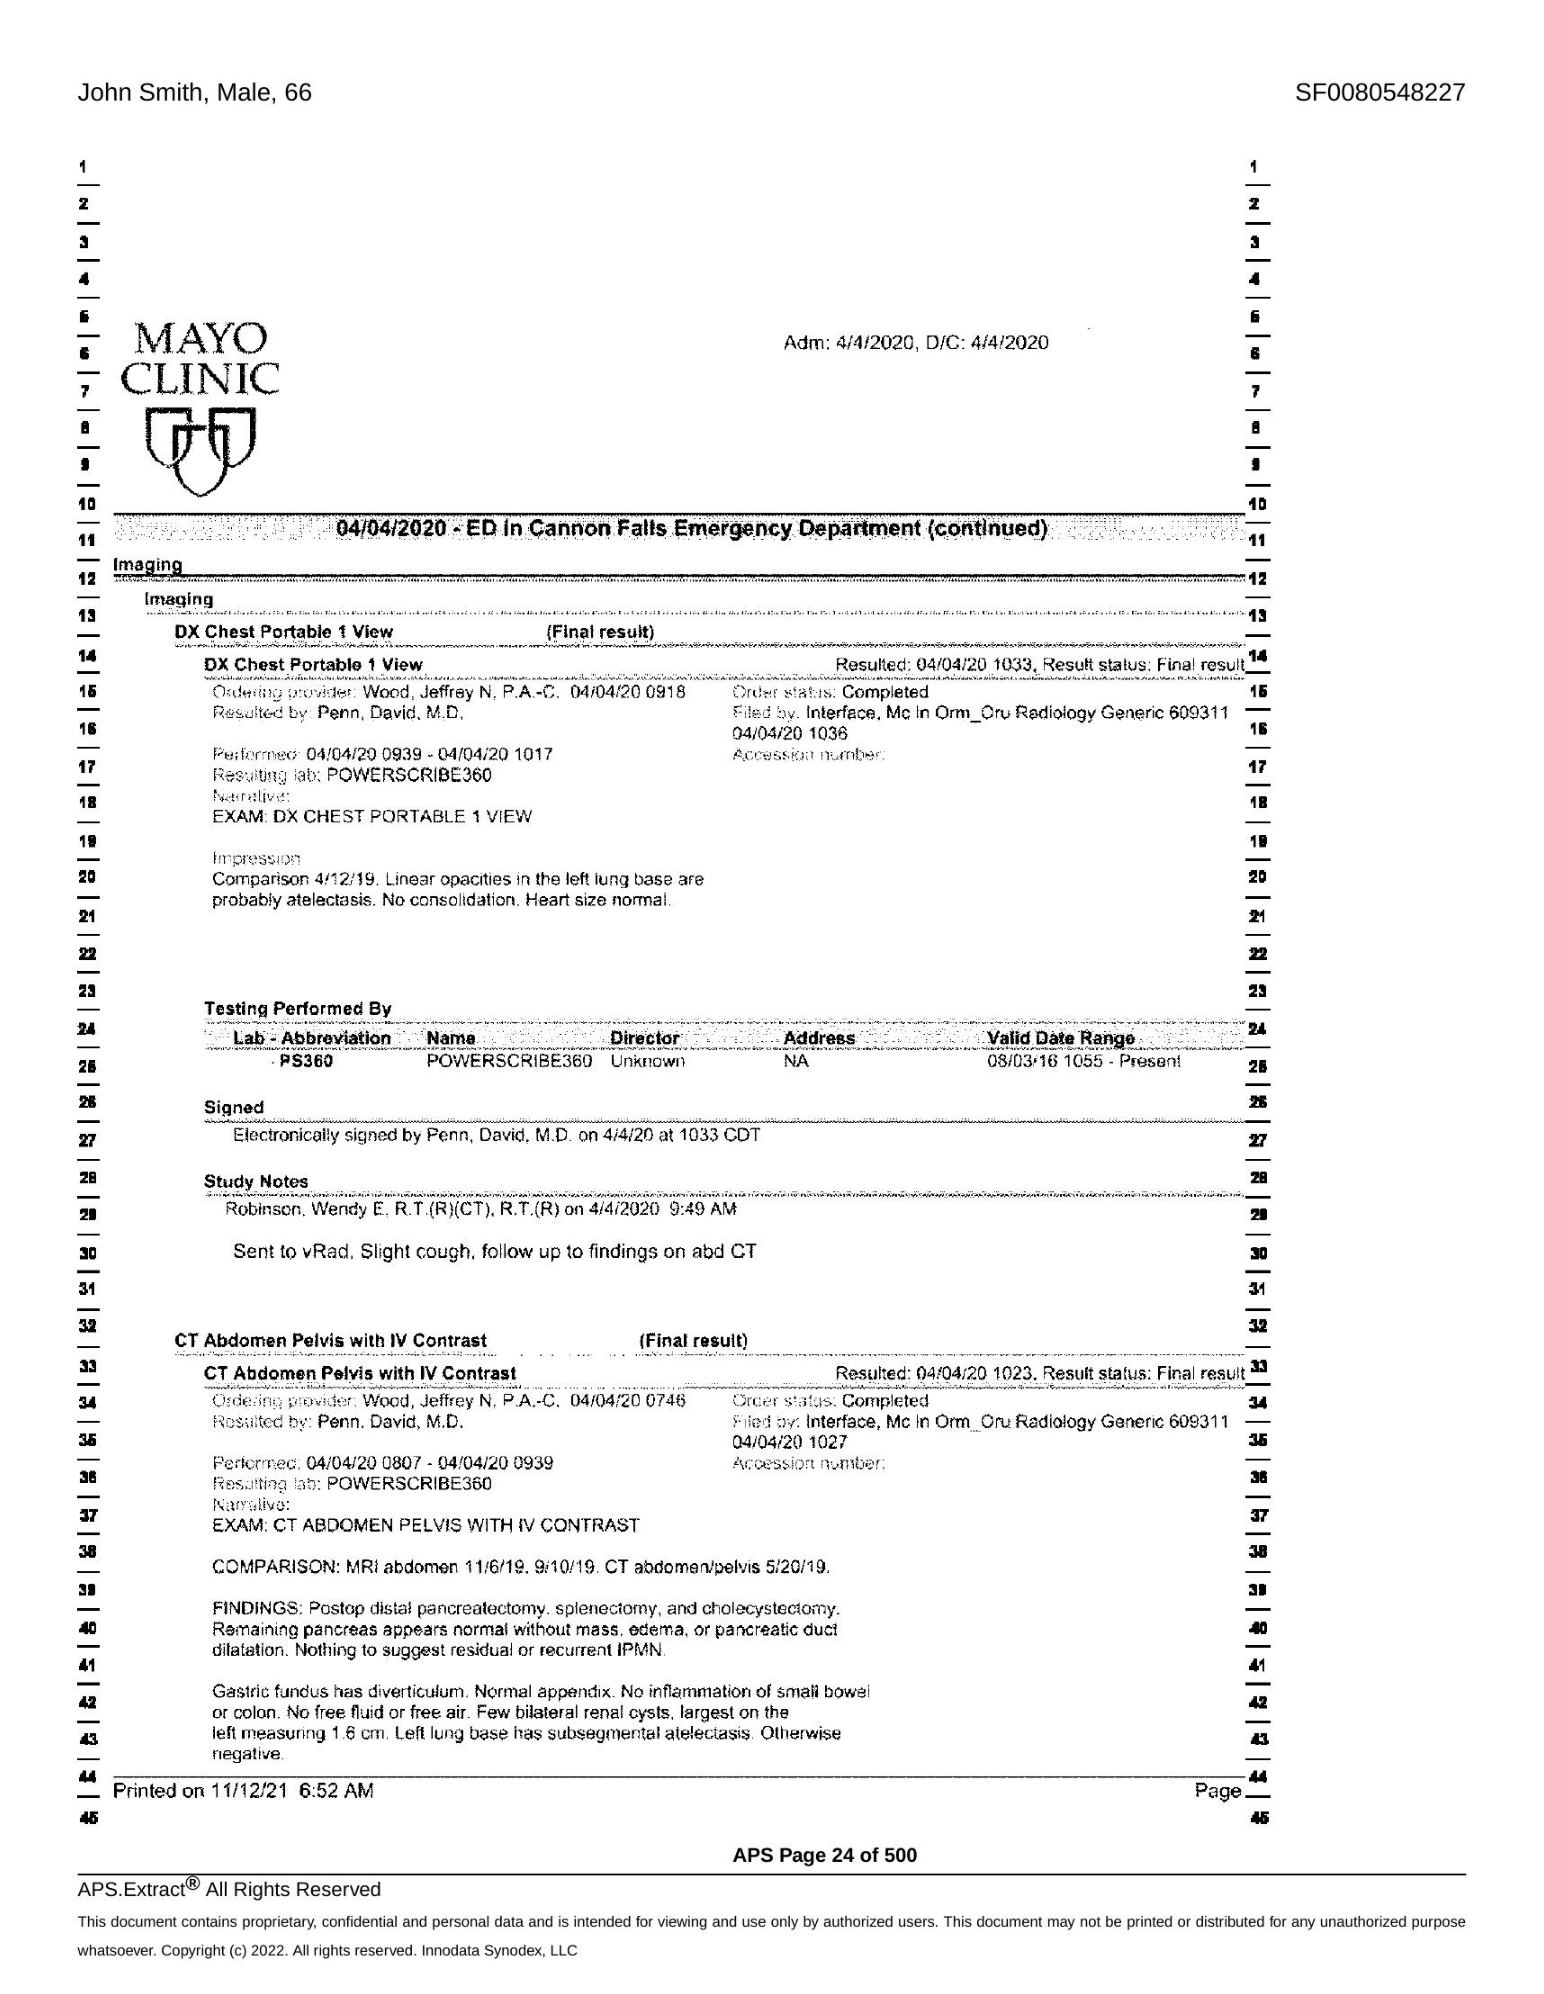

In [9]:
img_display(img_path="doc.jpg")

In [10]:
results = psm_options("doc.jpg")
print(results)

'John Smith, Male, 66\n\nallel ales |s|s|\n\nMAYO Adm: 4/4/2026, D/C: 4/4/2020\nCLINIC\n\n     \n \n  \n\nox Chest Portable 1 t View {Finat result)\n\n \n\n04/06/2020 - ED in Gannon Falis Emergency Department (continued)\n\nTalal2lal<lei~lerelaleis i=\n\nDX Chest Portable 1 View\n\n \n \n   \n\n~0. 04704120 0918\nResulted & by Penn, David, M.D. y. Interface, Mc tn Orm_Oru Radiology Generic 699311 —\n94/04/20 1036 i\n\nforreacs 04/04/20 0939 - 04/04/20 1017 Acegssigd number\n\nPex\n\n \n\n \n\n \n\nab; POWERSCRIBE 360 a\n\n4B\n\nEXAM: DX CHEST PORTABLE 1 VIEW —\n18\n\nImpression =\nComparison 4/12/19. Linear opacities in the left lung base are 20\nprobably atelectasis. No consolidation. Heart size normal m\nzm\n\n  \n  \n \n   \n  \n  \n  \n \n   \n\nTesting Performed By\nAbbreviation\n\n   \n\nNama.\n\n \n\nSigned\nElectronically signed by Penn, David, M.D. on 4/4/20 at 1033 CDT\n\nStudy Notes\n\nRobinson Wendy\n\n   \n\n \n\n"RT (RUCT). RTAR) on 4/4/2020 9\n\nSent to vRad, Slight coug

In [11]:
results = psm_options("doc.jpg", options="--psm 12")
print(results)

John Smith, Male, 66

SF0080548227

MAYO

Adm: 4/4/2020, D/C: 4/4/2020

CLINIC

04/06/2020 - ED in Gannon Falls Emergency Department (continued)

12

Imagin:

Imaging

14

ox Chest Portable A View

eh BAERS eo Preece

{Final resuit)

sheen errr ST nr

eae

Sa

Talslslelel=|~lelelsleis i>

14

DX Chest Portable 1 View

sent

Resulted: 04/04/20 1033,

esult statu Final result 4

16

eas

ter Wood, Jeffrey N. P.

c.

04/04/20 0918

is

fat

s: Completed

16

Resulted by Penn, David. M.D,

16

Interface, Mc In Orm_Oru Radiology Generic 609311. —

94/04/20 1036

7

Per

forrmece 04/04/29 0939 - 04/04/20 1017

a

Ssigut aurnber

a

ab. POWERSCRIBE260

18

EXAM: DX CHEST PORTABLE 1 VIEW

4B

18

w

Impres:

OA

20

Comparison 4/12/19. Linear opacities in the left lung base are

ry

probably atelectasis. No consolidation. Heart size normal

:

aa

Testing Performed By

=e

Abbreviation

Nama.

Director

Address

lid Date

oon

a

ge

$360

RIB

NA

6 10!

Presi

Signed

Electronically signed b

##Image Processing Pipeline for OCR

In [ ]:
img_display(img_path="doc.jpg")

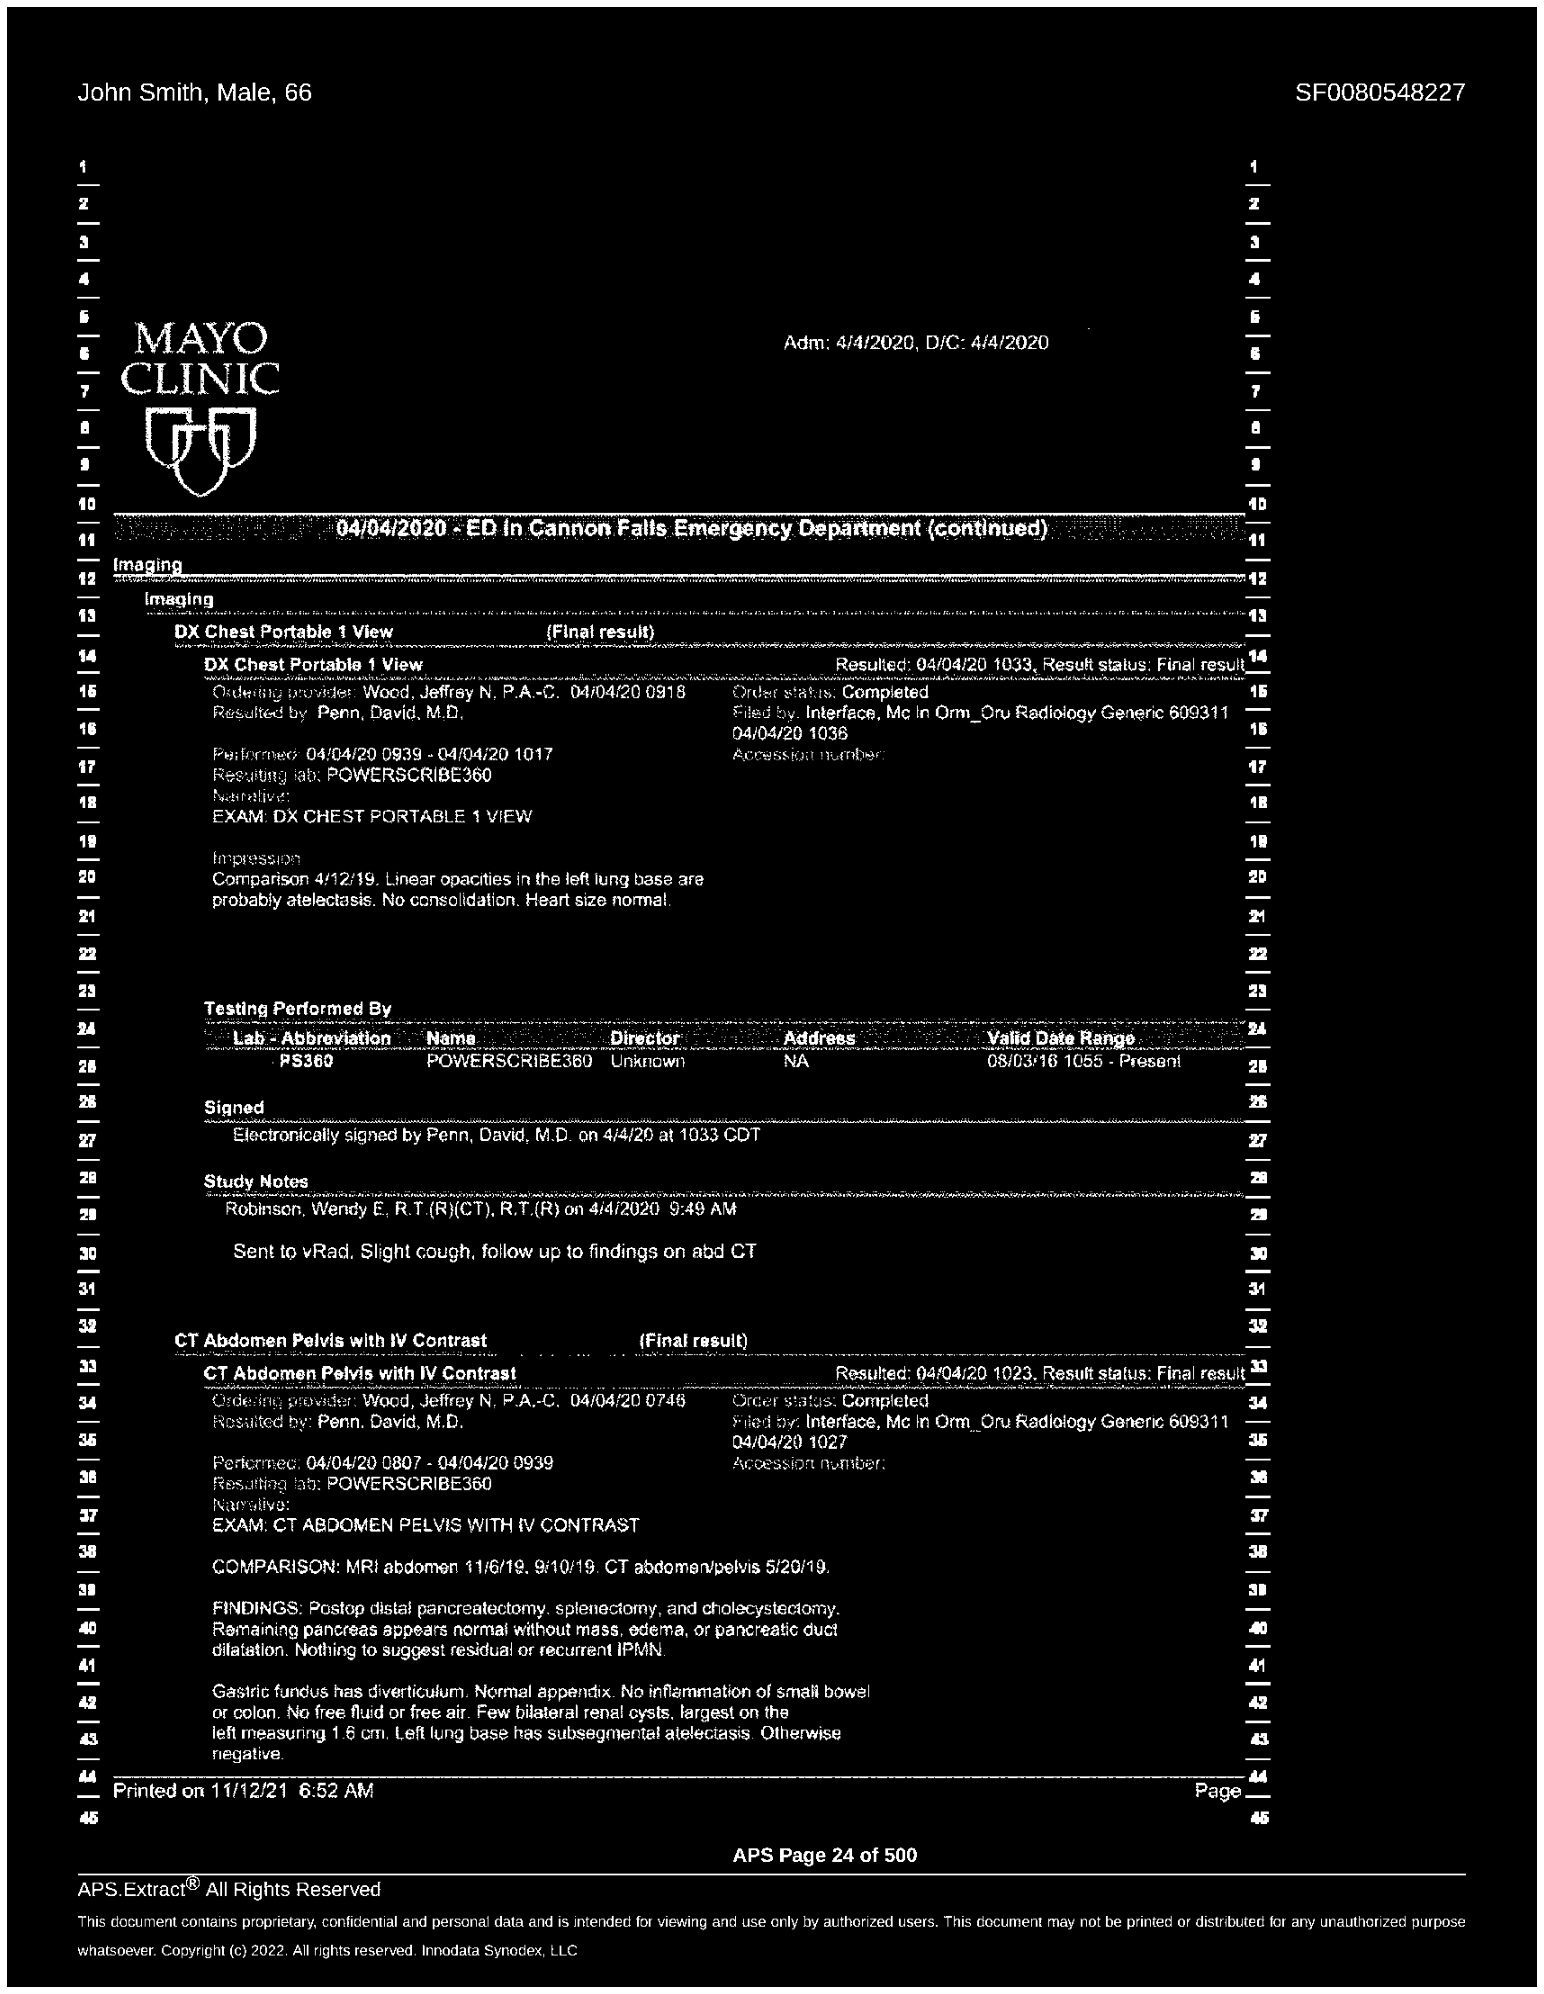

In [23]:
# load the input image and convert it to grayscale
image = cv2.imread("doc.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# threshold the image using Otsu's thresholding method
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
img_display(thresh)

The distance transform starts to reveal the digits themselves, since there is a larger
distance from the foreground pixels to the background. The distance transform has the added
benefit of cleaning up much of the noise in the image’s background.

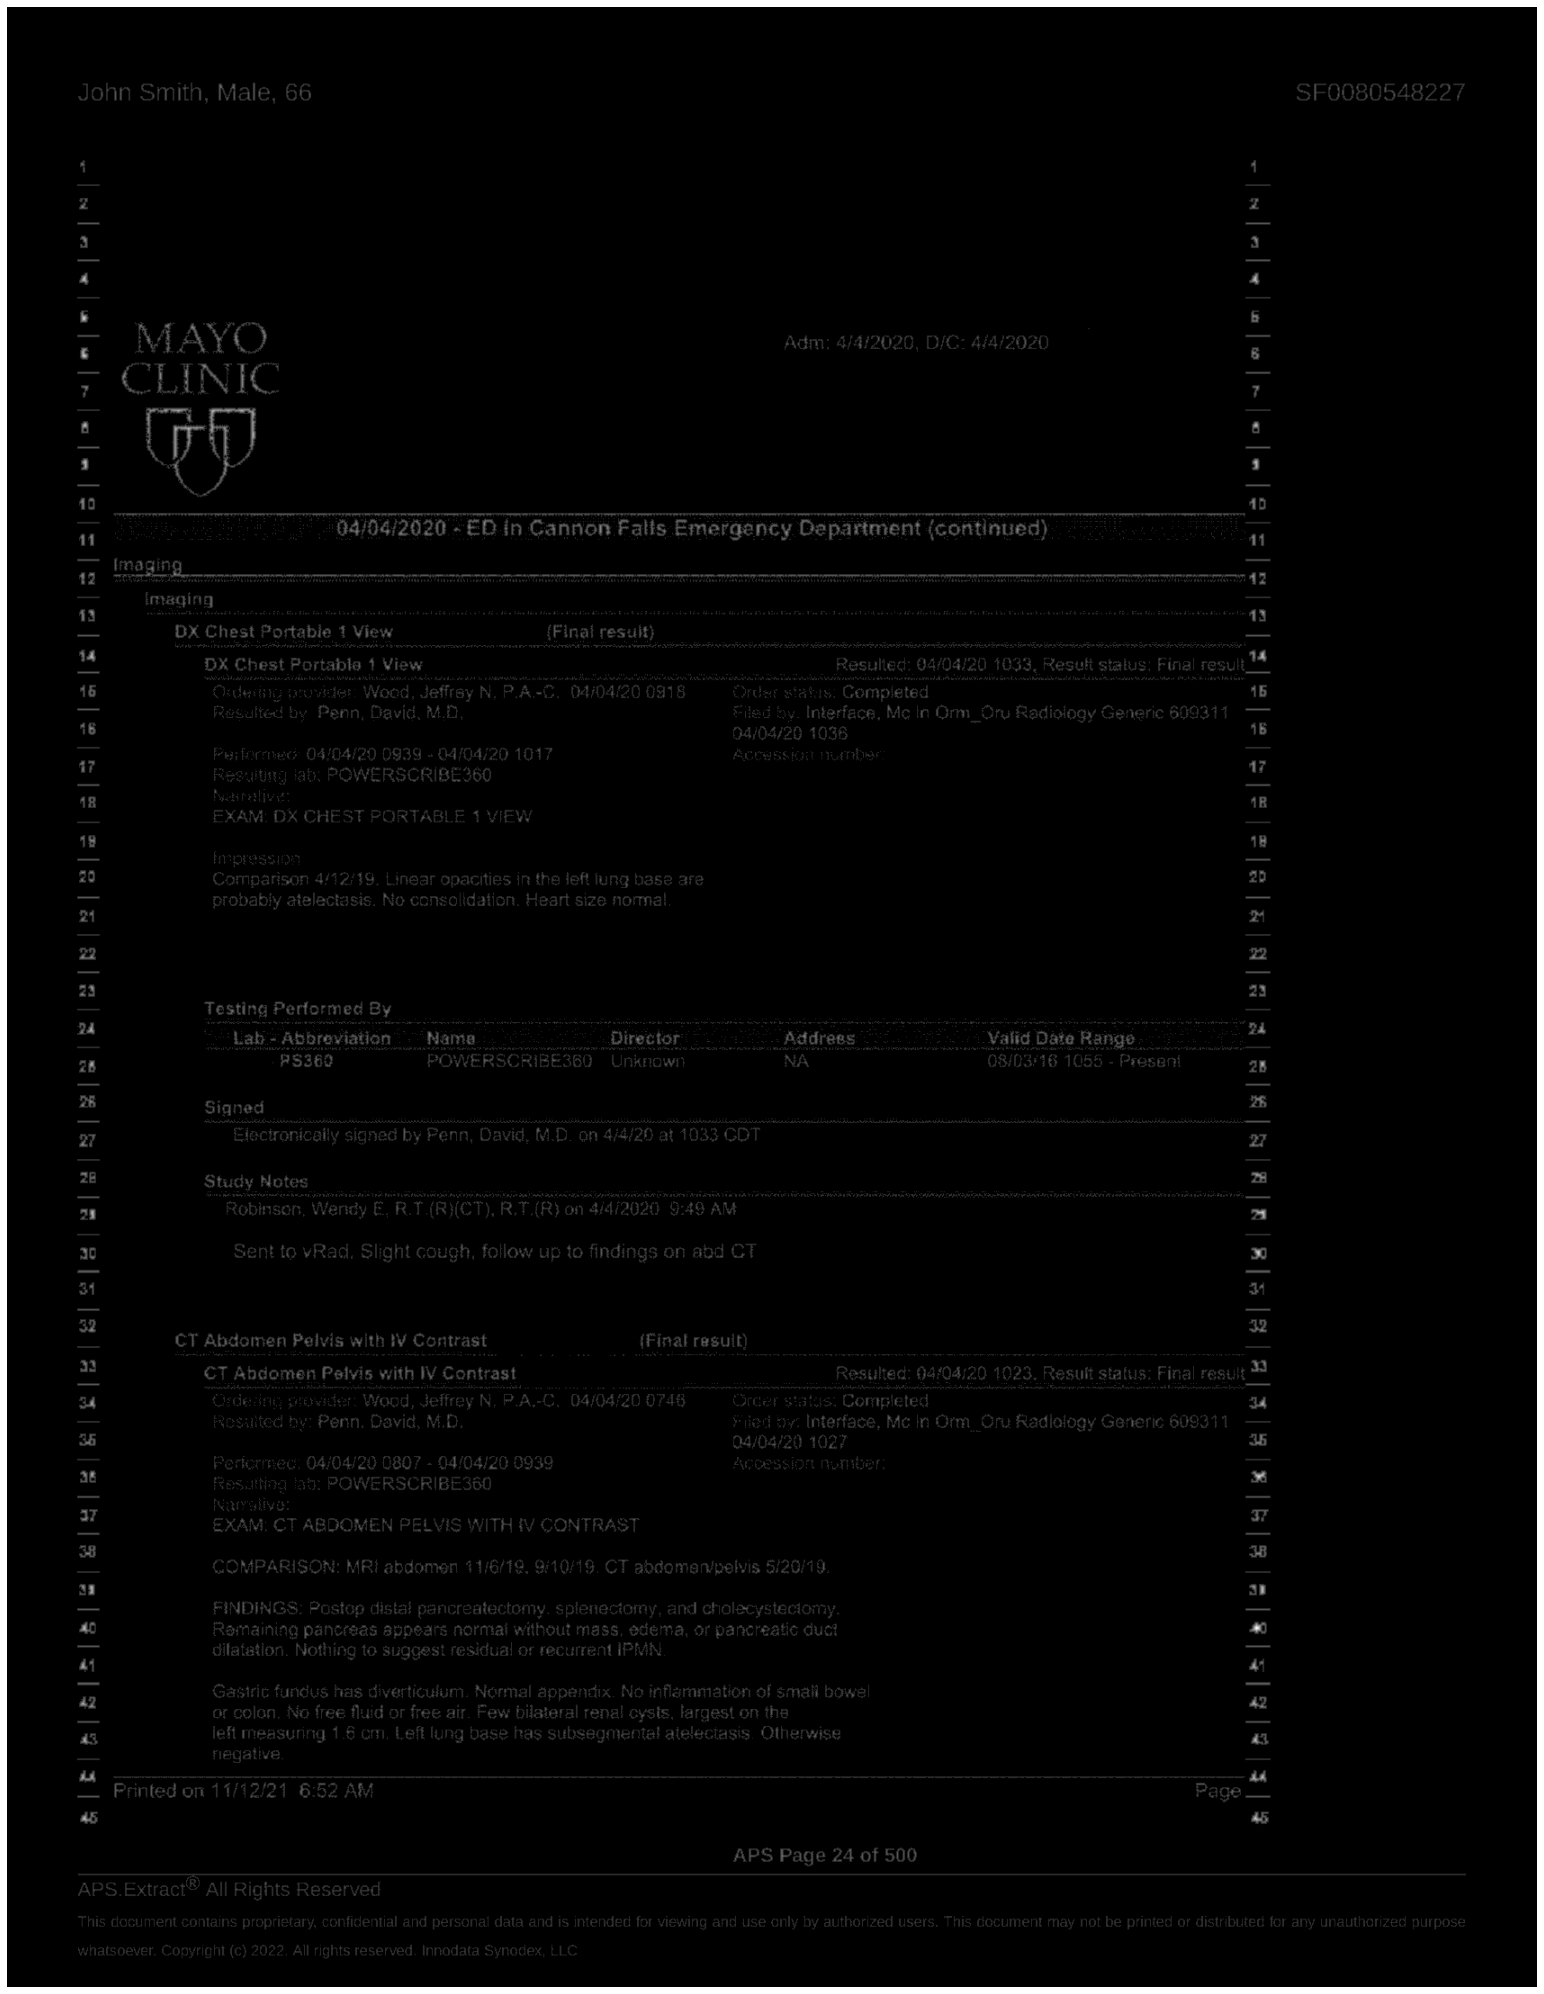

In [24]:
# apply a distance transform
dist = cv2.distanceTransform(thresh, cv2.DIST_L2, 5)

# normalize the distance transform
dist = cv2.normalize(dist, dist, 0, 1.0, cv2.NORM_MINMAX)
dist = (dist * 255).astype("uint8")

img_display(dist)

From there, we apply Otsu’s thresholding method.

Notice that we are not using the inverse binary threshold because we want the text to remain in the foreground (white).

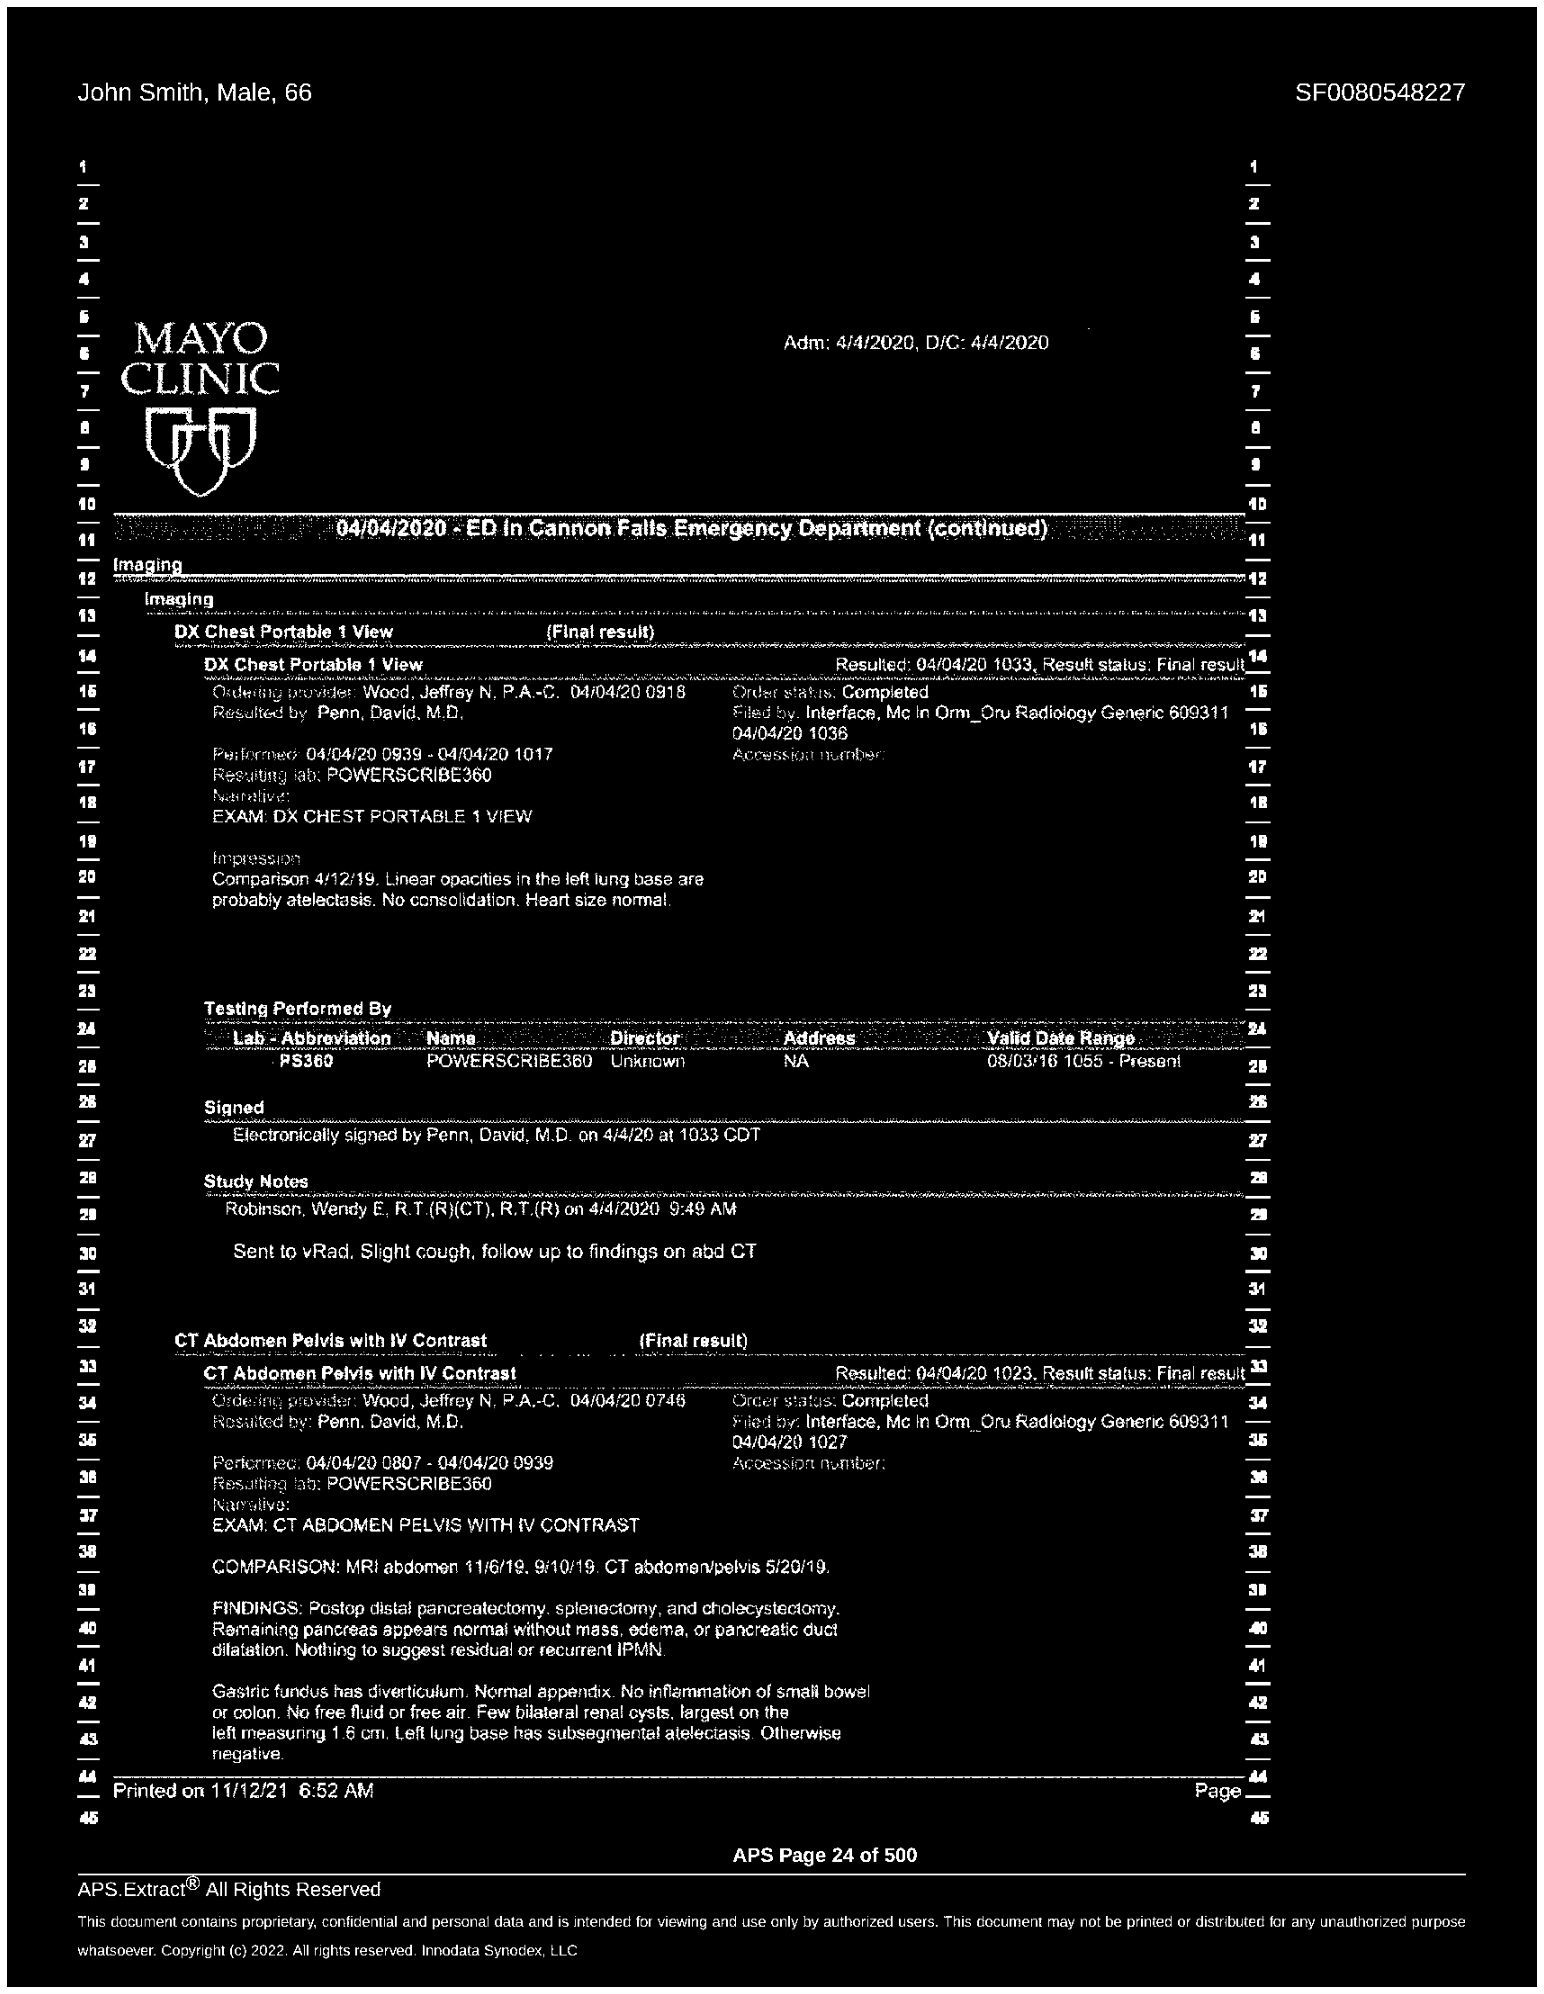

In [25]:
# threshold the distance transform using Otsu's method
dist = cv2.threshold(dist, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
img_display(dist)

In [26]:
# OCR the input image using Tesseract
options="--psm 8 -c tessedit_char_whitelist=0123456789"

text = pytesseract.image_to_string(dist, config=options)
print(text)

=



Let’s continue to clean up our foreground:

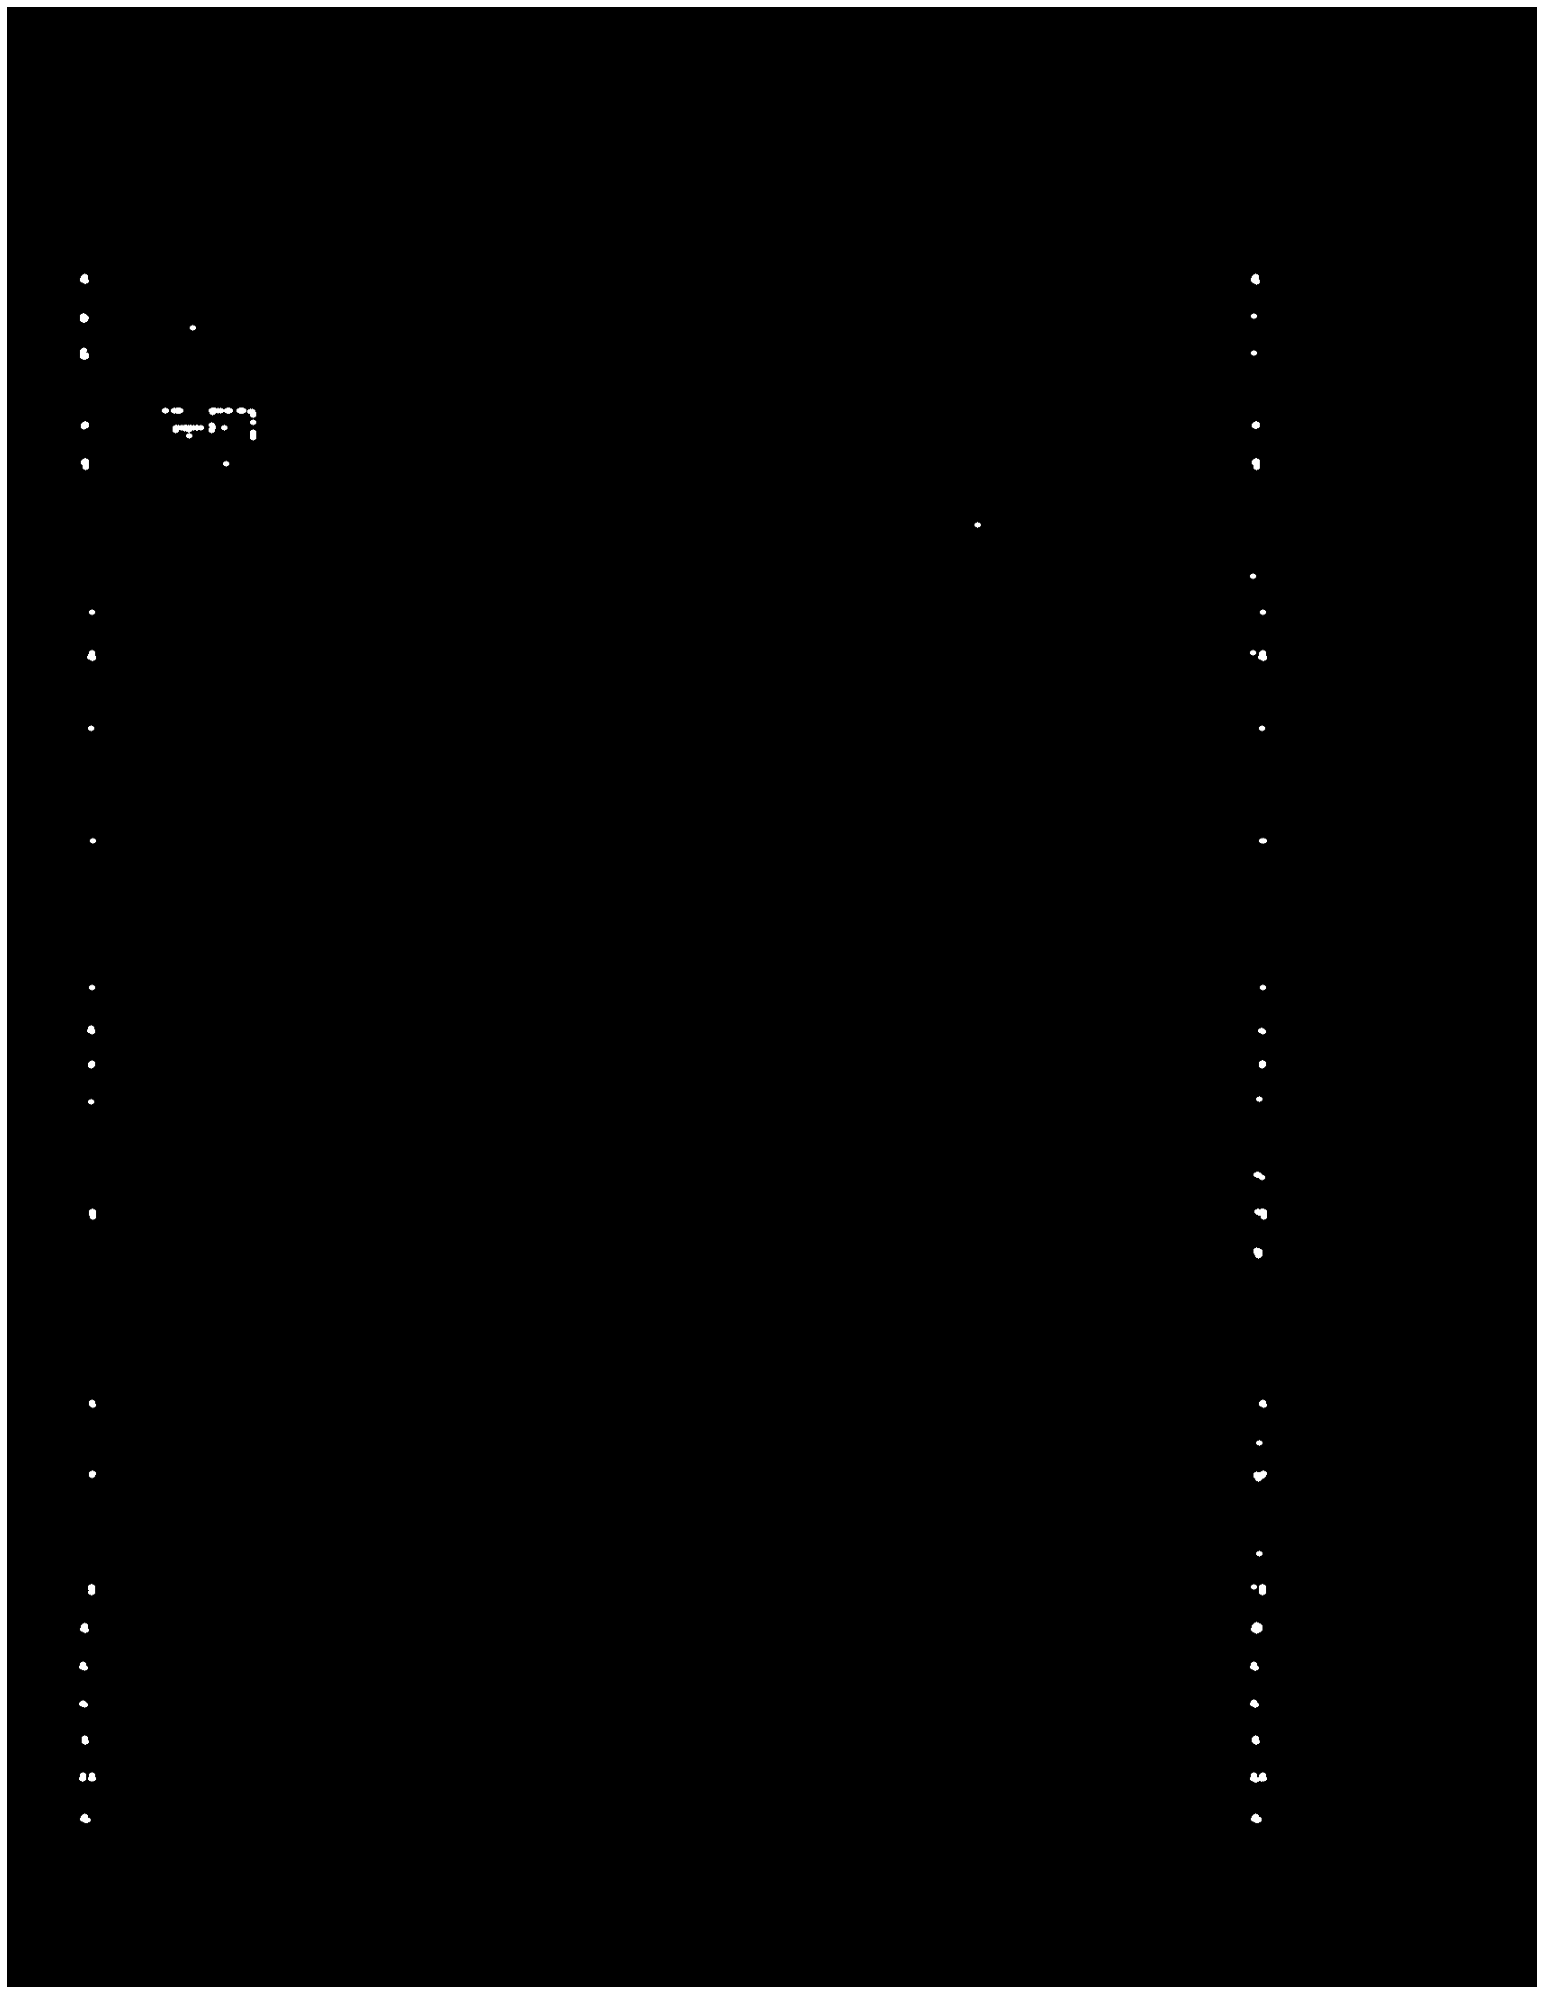

In [15]:
# apply an "opening" morphological operation to disconnect components in the image
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
opening = cv2.morphologyEx(dist, cv2.MORPH_OPEN, kernel)

img_display(opening)

Applying an opening morphological operation (i.e., dilation followed by erosion) disconnects
connected blobs and removes noise.

Notice that our
opening operation effectively disconnects the “1” character from the blob at the top of the image.

At this point we can extract contours from the image and filter them to reveal only the digits:

In [19]:
# find contours in the opening image
cnts = cv2.findContours(opening.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = grab_contours(cnts)

chars = []
# loop over the contours
for c in cnts:
  # compute the bounding box of the contour
  (x, y, w, h) = cv2.boundingRect(c)
  #print(w, h)
  # check if contour is at least 35px wide and 100px tall
  if w >= 5 and h >= 5:
    chars.append(c)

Extracting contours in a binary image means that we want to find all the isolated foreground
blobs.

After we’ve found all of our contours (cnts) we need to determine which ones to discard and
which to add to our list of characters.

Now that we’ve isolated our character contours, let’s clean up the surrounding area:

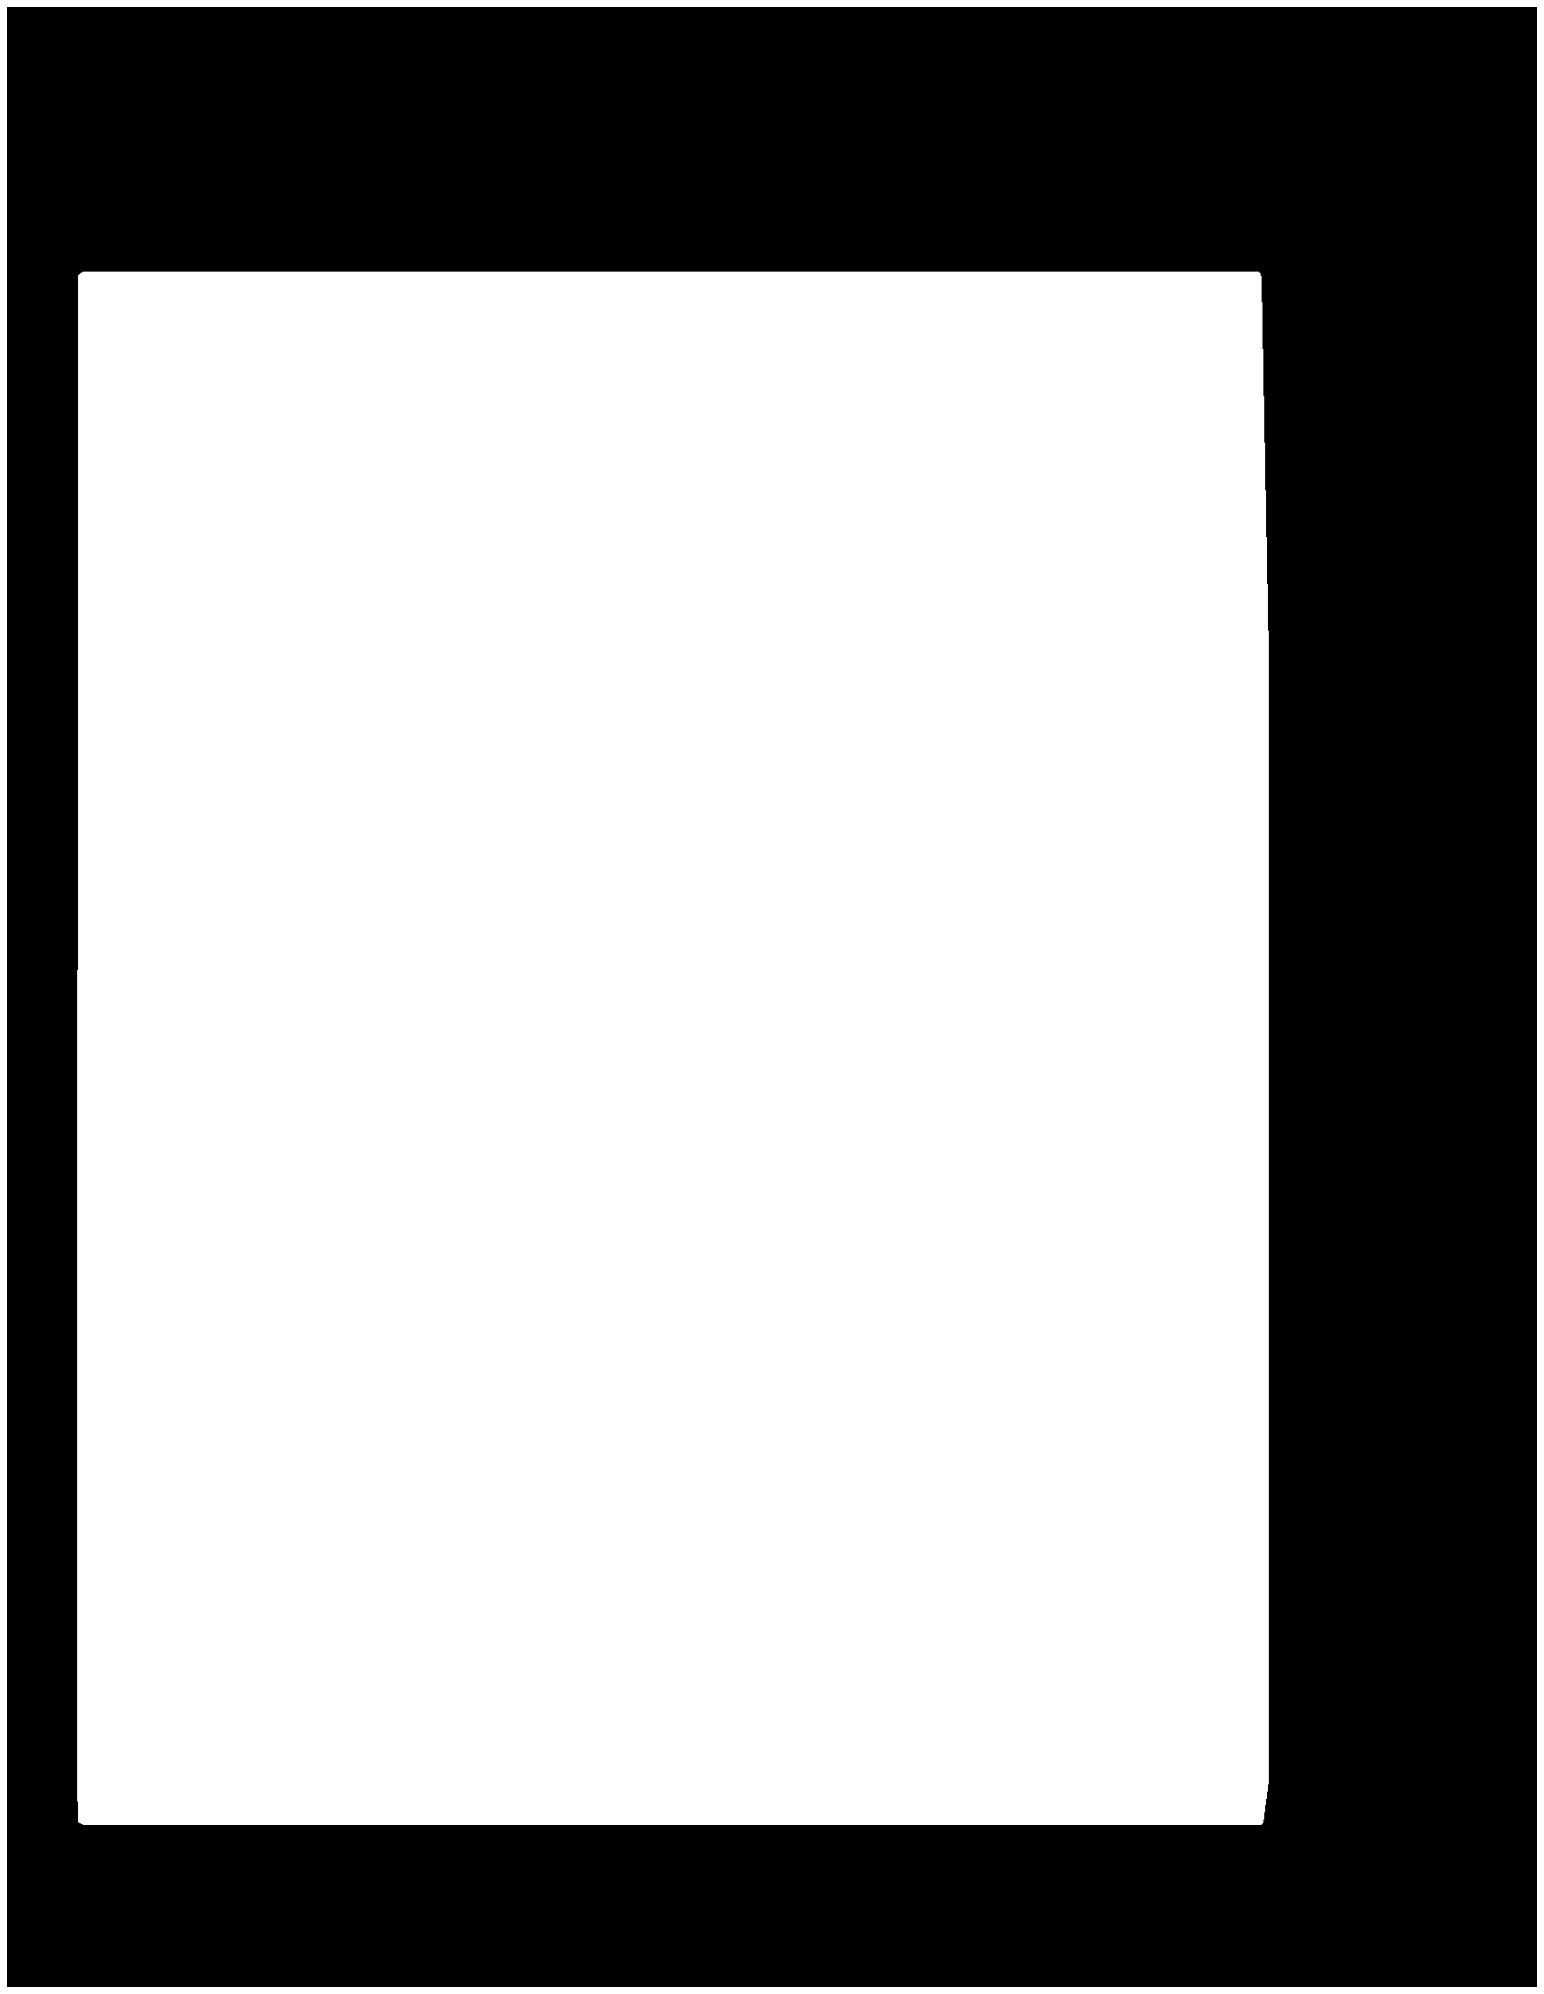

In [20]:
# compute the convex hull of the characters that will enclose all of the digits
chars = np.vstack([chars[i] for i in range(0, len(chars))])
hull = cv2.convexHull(chars)

# allocate memory for the convex hull mask, draw the convex hull on the image, and then enlarge it via a dilation
mask = np.zeros(image.shape[:2], dtype="uint8")
cv2.drawContours(mask, [hull], -1, 255, -1)
# Enlarge (dilate) the mask
mask = cv2.dilate(mask, None, iterations=2)

img_display(mask)

Computing the bitwise AND (between opening and mask), cleans up our
opening image and produces our final image consisting of only the digits and no background noise.

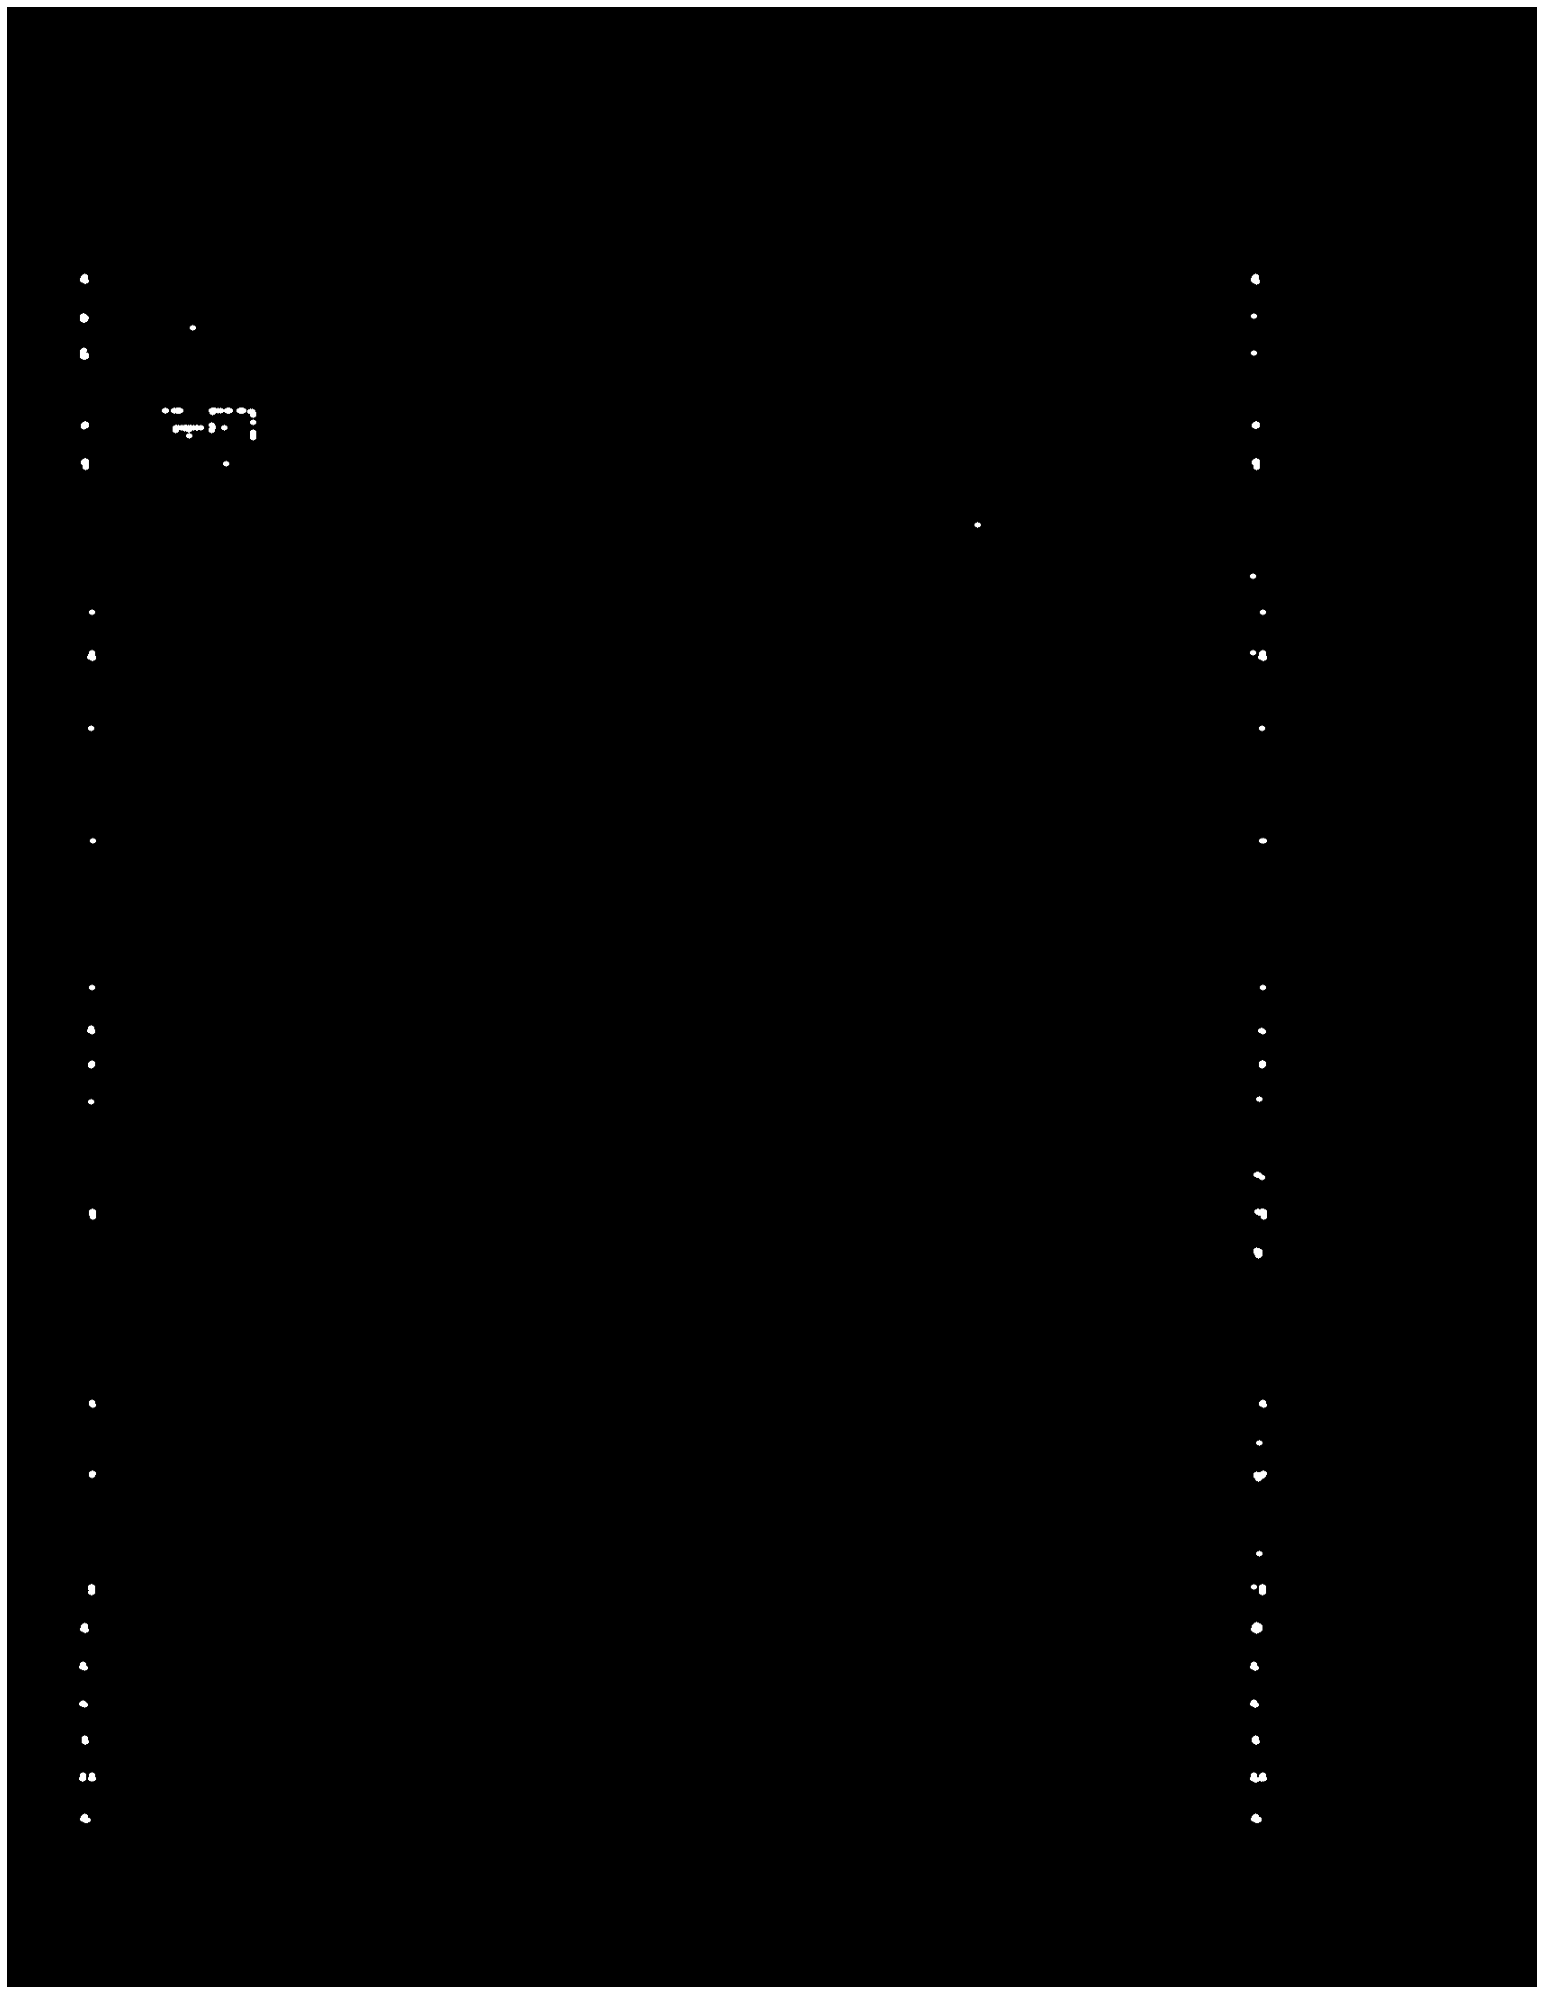

In [21]:
# take the bitwise of the opening image and the mask to reveal *just* the characters in the image
final = cv2.bitwise_and(opening, opening, mask=mask)
img_display(final)

That’s it for our image processing pipeline — we now have a clean image which will play nice with Tesseract. 

Let’s perform OCR and display the results:

In [22]:
# OCR the input image using Tesseract
options="--psm 8 -c tessedit_char_whitelist=0123456789"

text = pytesseract.image_to_string(final, config=options)
print(text)

-



By using a bit of basic image processing and the OpenCV library, we were able to
clean up our input image and then correctly OCR it using Tesseract, even though Tesseract
was unable to OCR the original input image!